# Homework 02

## Q1. Install MLflow

What's the version that you have?

In [ ]:
!python -m pip install mlflow

*Answer:*

In [23]:
f"MLFlow version: {mlflow.__version__}"

'MLFlow version: 1.26.0'

## Q2. Download and preprocess the data

How many files were saved to OUTPUT_FOLDER?

In [20]:
!python preprocess_data.py --raw_data_path ../data/ --dest_path ./output

In [22]:
!ls -l ./output

total 7844
-rw-r--r-- 1 user 197121  397058 May 27 20:22 dv.pkl
-rw-r--r-- 1 user 197121 2805216 May 27 20:22 test.pkl
-rw-r--r-- 1 user 197121 2661168 May 27 20:22 train.pkl
-rw-r--r-- 1 user 197121 2166546 May 27 20:22 valid.pkl


*Answer:*

There are 4 files in output folder

## Q3. Train a model with autolog

How many parameters are automatically logged by MLflow?

In [24]:
%%time

!python train.py --data_path ./output

Wall time: 2min 21s


*Answer:*

In total, 18 hyperparameters were logged automatically (see screenshot below).

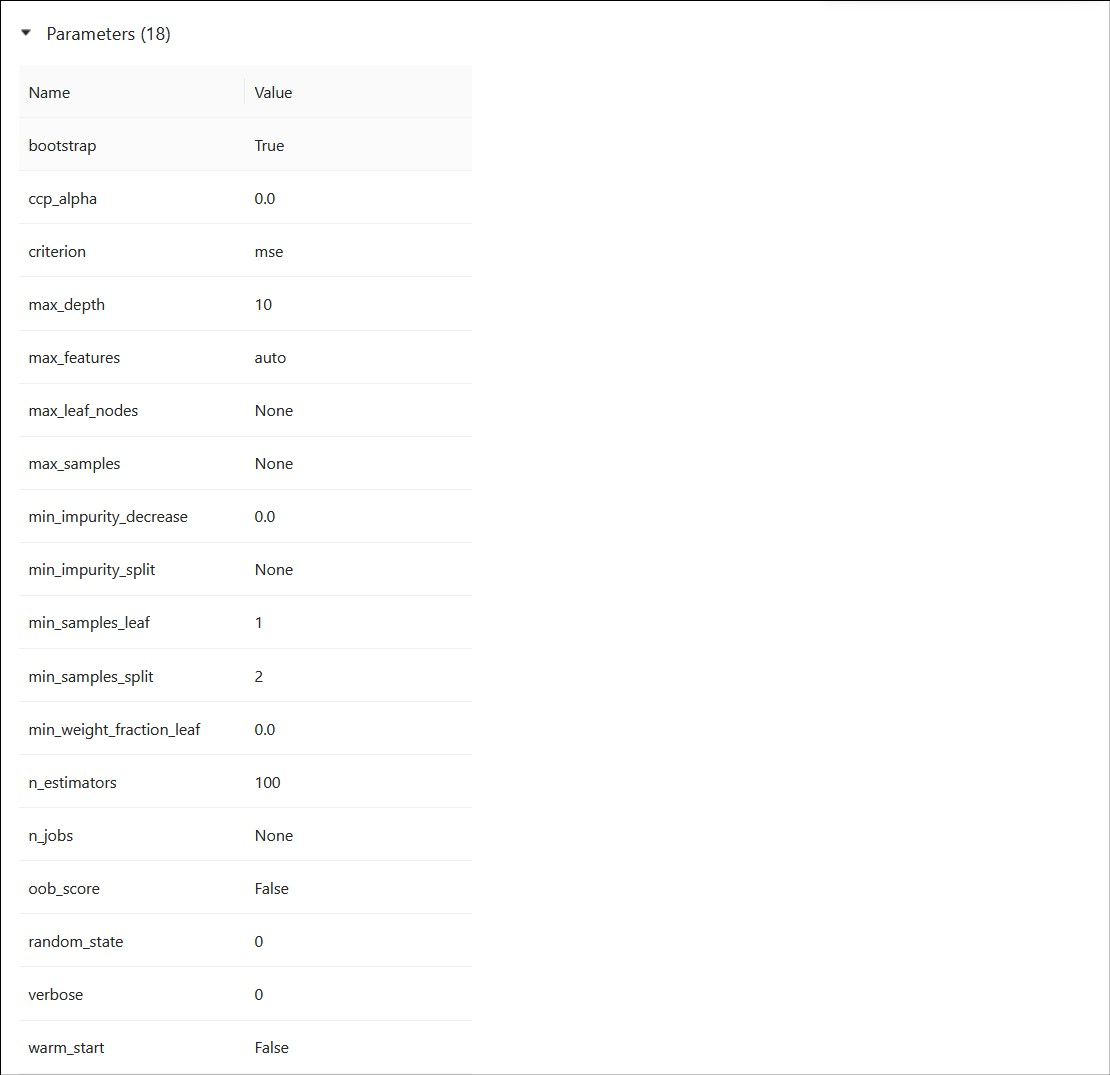

In [76]:
from IPython.display import Image
Image(filename="img/q3-autologger-hyperparameters.jpg")

## Q4. Launch the tracking server locally

In addition to backend-store-uri, what else do you need to pass to properly configure the server?

In [ ]:
!mkdir artifacts
!mlflow server --backend-store-uri sqlite:///mydb.sqlite --default-artifact-root artifacts

*Answer:*

The `artifacts` value has to be passed to the `--default-artifact-root` argument to properly start the Tracking Server, backend and artifact stores in MLFlow (see screenshot below). 

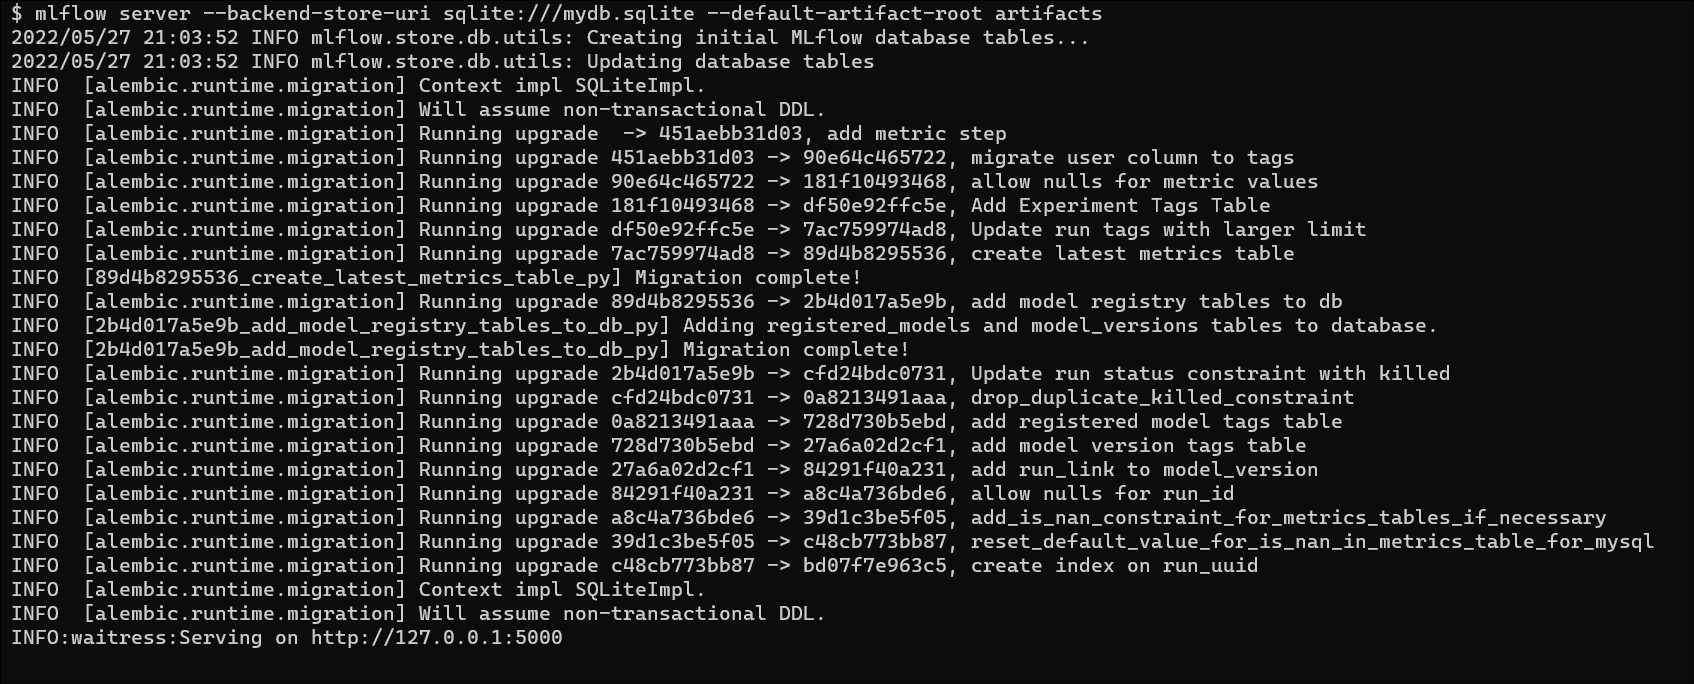

In [75]:
from IPython.display import Image
Image(filename="img/q4-mlflow-tracking-server.jpg")

## Q5. Tune the hyperparameters of the model

What's the best validation RMSE that you got?

In [44]:
%%time

!python hpo.py --data_path ./output

Wall time: 12min 40s

 14%|#4        | 7/50 [04:25<37:42, 52.61s/trial, best loss: 6.651438559376775]


2022/05/27 22:19:49 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt' does not exist. Creating a new experiment.


100%|##########| 50/50 [12:30<00:00, 15.02s/trial, best loss: 6.6284257482044735]


*Answer:*

The best validation RMSE is `6.628` (see screenshot below).

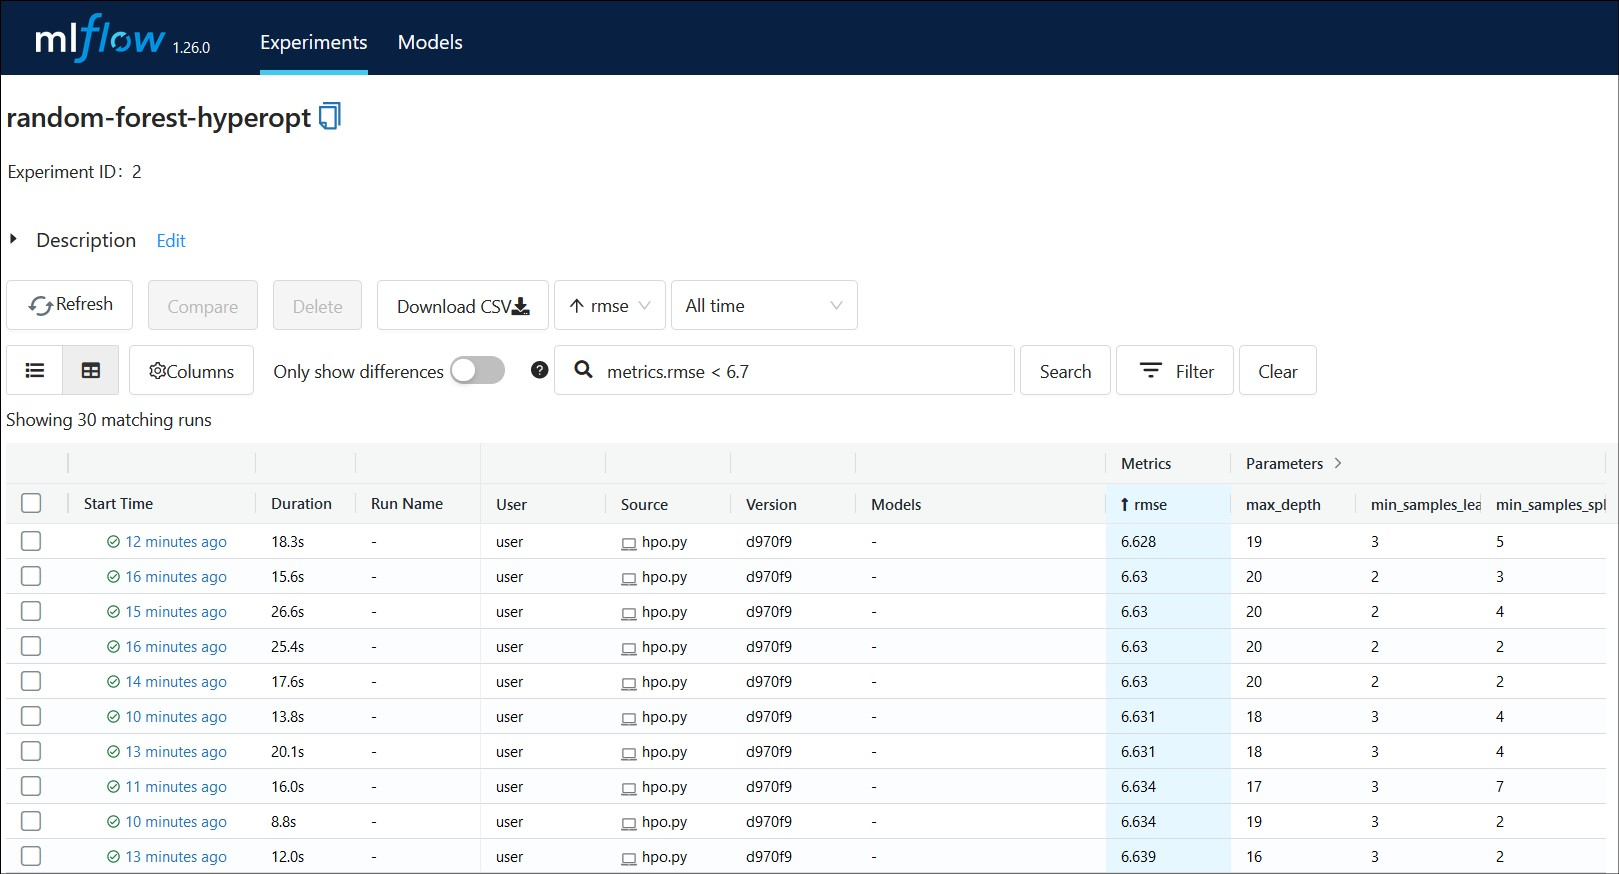

In [74]:
from IPython.display import Image
Image(filename="img/q5-hyperopt-rmse-2.jpg")

## Q6. Promote the best model to the model registry

What is the test RMSE of the best model?

In [70]:
%%time

!python register_model.py --data_path ./output --top_n 5

Wall time: 1min 53s


Successfully registered model 'random-forest-regressor-tuned'.
2022/05/27 23:50:31 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: random-forest-regressor-tuned, version 1
Created version '1' of model 'random-forest-regressor-tuned'.


*Answer:*

The best model's RMSE is `6.548`

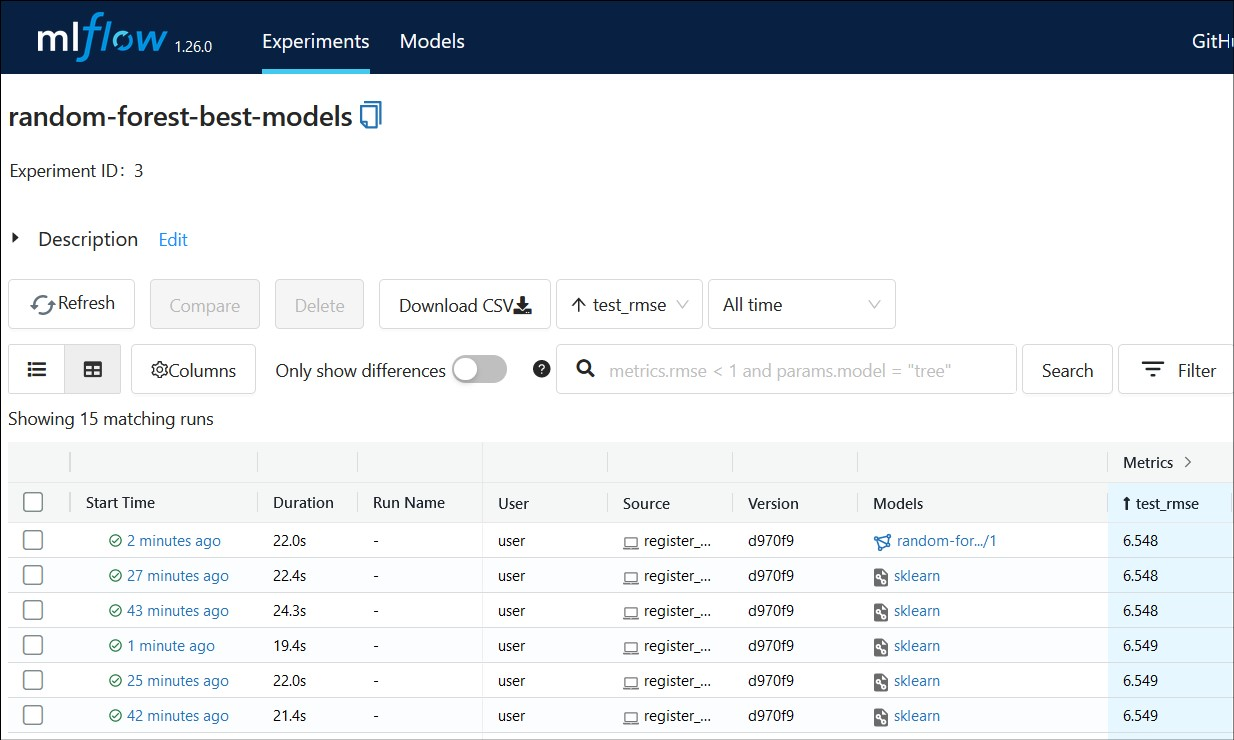

In [72]:
from IPython.display import Image
Image(filename="img/q6-experiments.jpg")

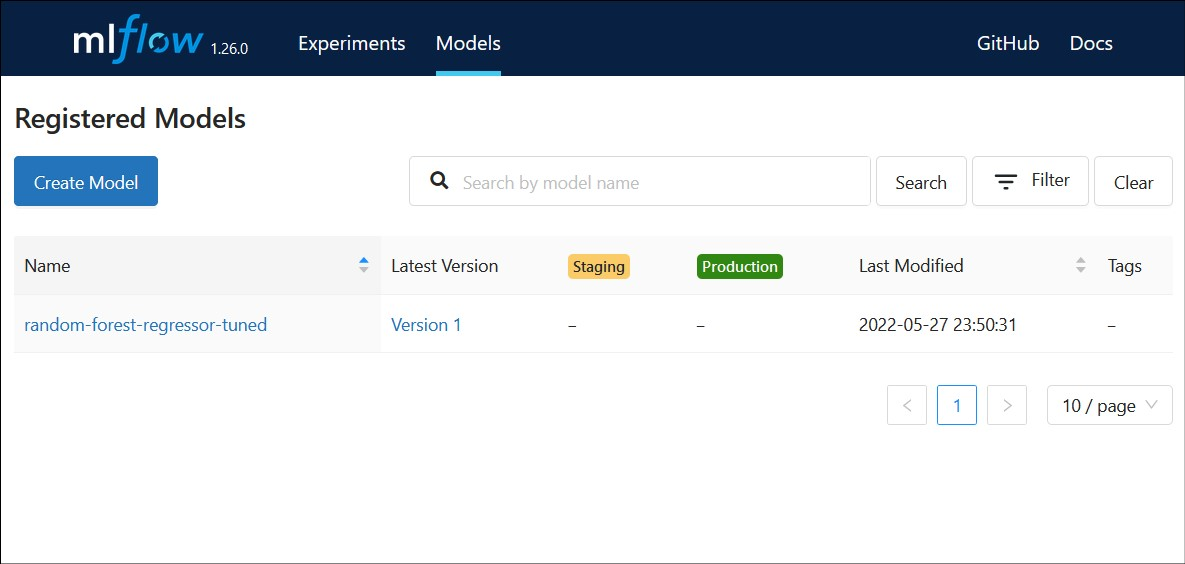

In [73]:
from IPython.display import Image
Image(filename="img/q6-registered-model.jpg")